In [1]:
#  Pick first 15k data points to work on the time effeciency
# Exercise: Perform the same analysis on all of the 42k data-points

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


d0 = pd.read_csv(r'D:\corona\MNIST\train.csv')
print(d0.head(5))                  # First 5 rows of d0

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
# save the labels into a vairable 1

l = d0['label']

In [3]:
# Drop the label feature and store the pixel data in d

d = d0.drop("label", axis=1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


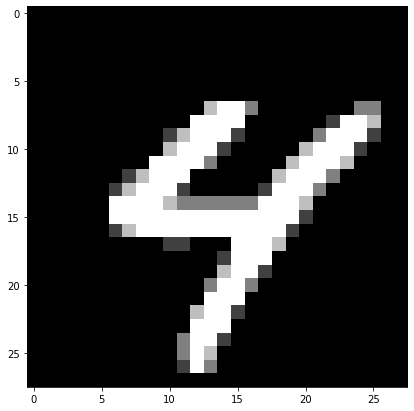

4


In [5]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 250

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

# 2D Visualization using PCA

In [6]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data=", data.shape)

The shape of sample data= (15000, 784)


### Data preprocessing : Standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit_transform(data)

scale.shape

(15000, 784)

In [8]:
# find the co-variance matrix which is: A^T * A
sample_data = scale

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of co-variance matrix=", covar_matrix.shape)

The shape of co-variance matrix= (784, 784)


In [9]:
# Finding the top 2 eigen-values and corresponding eigen-vectors
# for projection onto a 2-Dim space

from scipy.linalg import eigh

# the parameter 'eigenvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top2 (782 and 783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors:",vectors.shape)
# concerting the eigen vector into (2D) shape for easyness of further computation
vectors = vectors.T

print("Updated shape of eigen vector:", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal
# here the vectors[0] represent the eigen vector corresponding 2nd principal

Shape of eigen vectors: (784, 2)
Updated shape of eigen vector: (2, 784)


In [10]:
# projection the original data sample on the plane
# formed by 2 principal eigen vectors by vector-vector multiplication

new_coorelation = np.matmul(vectors, sample_data.T)

print("Resultant new data points shape ", vectors.shape, "X", sample_data.shape, "=", new_coorelation.shape)

Resultant new data points shape  (2, 784) X (15000, 784) = (2, 15000)


In [11]:
# appending label to the 2nd projected data
new_coorelation = np.vstack((new_coorelation, labels)).T

# creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data=new_coorelation, columns=("1st_principal", "2nd_principal", "Label"))
print(dataframe.head())

   1st_principal  2nd_principal  Label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


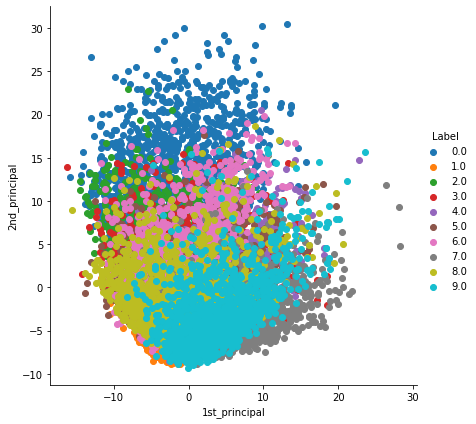

In [12]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='Label',size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

# PCA using sklearn

In [13]:
# Initialize the PCA

from sklearn import decomposition
pca = decomposition.PCA()

In [14]:
# configuring the parameters
# the number of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2D projects of simple data
print("Shape of pca.reduced.shape=", pca_data.shape)

Shape of pca.reduced.shape= (15000, 2)


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


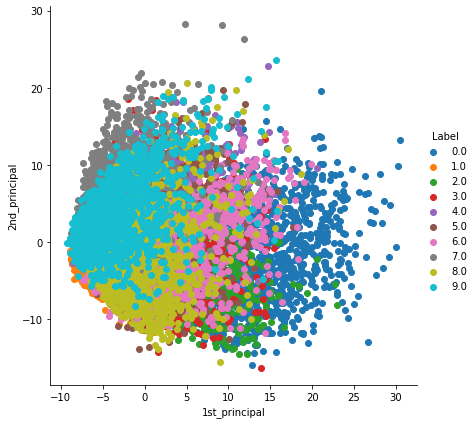

In [15]:
# attaching tje labels for each 2D data points
pca_data = np.vstack((pca_data.T, labels)).T

# Creating a new data frame which helps us in plotting the results data
pca_dataframe = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "Label"))
sns.FacetGrid(pca_dataframe, hue='Label',size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

 <br>
__________________________________________________________________________________________________________________________

# PCA for dimensionality reduction (not for visualization)

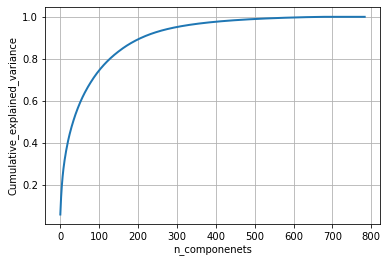

In [17]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)


# plot the pca spectrum

plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_componenets')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# cumsum :


# λ1/Σλi , λ1+λ2/Σλi , λ1+λ2+λ3/Σλi